In [21]:
# library and dataset

import pandas as pd
import numpy as np
dataset = pd.read_csv('bill_authentication.csv')
dataset

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [22]:
x = dataset.drop("Class", axis = 1)
y = dataset['Class']

In [23]:
# SPliting for test and training

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [24]:
# Model training

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

# **Now we want to confirm if out dataset is overfit, underfit or generalize well**

In [25]:
print(classifier.score(x_test,y_test))
print(classifier.score(x_train,y_train))

0.9709090909090909
1.0


In [26]:
# Prediction

y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1
 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0
 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0]


In [27]:
# evaluation

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[151   3]
 [  5 116]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       154
           1       0.97      0.96      0.97       121

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



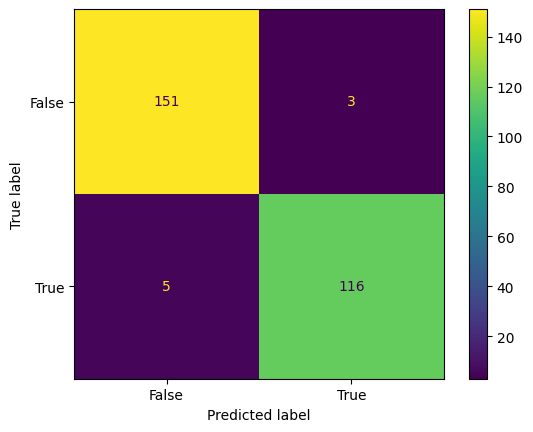

In [28]:
# Visualizing the confusion matix

import matplotlib.pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()

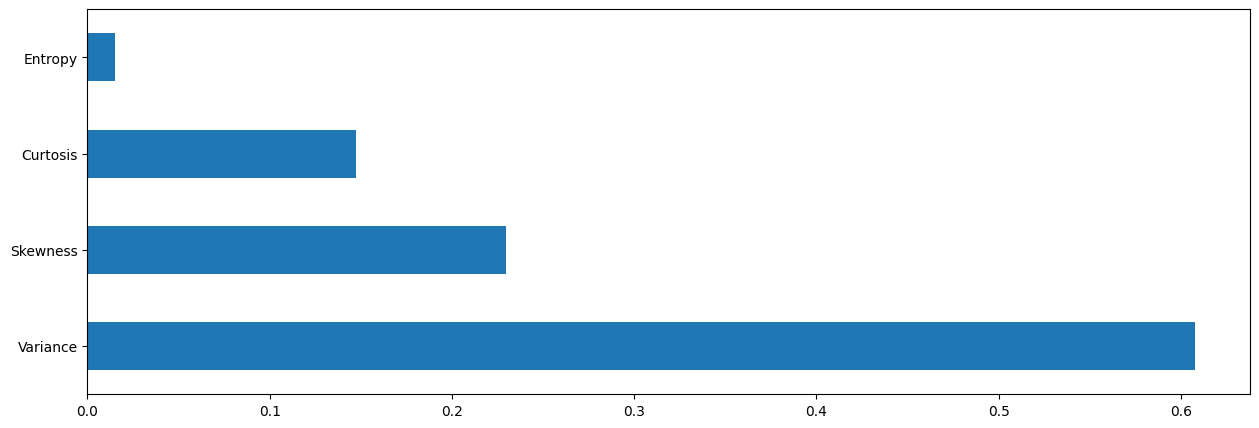

In [29]:
# feature importance

feat_importances = pd.Series(classifier.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh', figsize=(15,5))
plt.show()

In [30]:
# save for deployment

import pickle

model_file = open('bill_auth.pkl','wb')
pickle.dump(classifier,model_file)